The starter code can be found in k_means/k_means_cluster.py, which reads in the email + financial (E+F) dataset and gets us ready for clustering. You’ll start with performing k-means based on just two financial features--take a look at the code, and determine which features the code uses for clustering.

Run the code, which will create a scatterplot of the data. Think a little bit about what clusters you would expect to arise if 2 clusters are created.

In [4]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [5]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [6]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [7]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


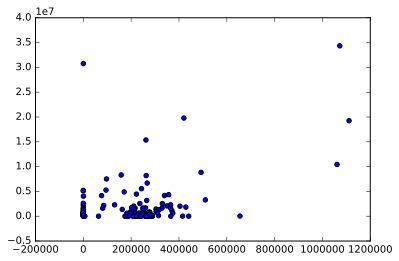

In [8]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [9]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred

from sklearn.cluster import KMeans

kmeansEst = KMeans(n_clusters = 2)
pred = kmeansEst.fit_predict(finance_features)

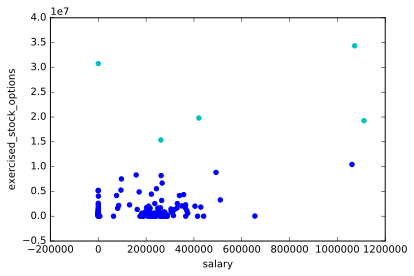

In [10]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

(You'll need to change the code that makes the scatterplot to accommodate 3 features instead of 2, see the comments in the starter code for instructions on how to do this.)

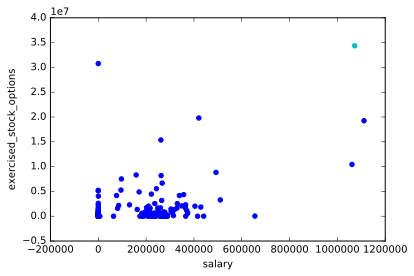

In [11]:
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


kmeansEst = KMeans(n_clusters = 2)
pred = kmeansEst.fit_predict(finance_features)

Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)

In the next lesson, we’ll talk about feature scaling. It’s a type of feature preprocessing that you should perform before some classification and regression tasks. Here’s a sneak preview that should call your attention to the general outline of what feature scaling does.

What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

(NB: if you look at finance_features, there are some "NaN" values that have been cleaned away and replaced with zeroes--so while those might look like the minima, it's a bit deceptive because they're more like points for which we don't have information, and just have to put in a number. So for this question, go back to data_dict and look for the maximum and minimum numbers that show up there, ignoring all the "NaN" entries.)



In [12]:
def max_min(key):
    eso = [v[key] for k, v in data_dict.iteritems() if v[key] != "NaN"] 

    return max(eso), min(eso)
    
max_min("exercised_stock_options")

(34348384, 3285)

What are the maximum and minimum values taken by “salary”?

In [13]:
max_min("salary")

(1111258, 477)

Apply feature scaling to your k-means clustering code from the last lesson, on the “salary” and “exercised_stock_options” features (use only these two features). What would be the rescaled value of a "salary" feature that had an original value of \$ 200,000, and an "exercised_stock_options" feature of \$ 1 million? (Be sure to represent these numbers as floats, not integers!)


In [44]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data2 = featureFormat(data_dict, ['poi', 'salary'] )
poi, finance_features2 = targetFeatureSplit( data2 )

data3 = featureFormat(data_dict, ['poi', 'exercised_stock_options'] )
poi, finance_features3 = targetFeatureSplit( data3 )

In [47]:
scaler = MinMaxScaler()
finance_features_minmax = scaler.fit_transform(finance_features2)
finance_features_minmax
scaler.transform([[200000]])

array([[ 0.17962407]])

In [46]:
finance_features_minmax = scaler.fit_transform(finance_features3)
finance_features_minmax
scaler.transform([[1000000]])

array([[ 0.02902059]])